<center>
<img src="logo.png" height="900"> 
</center>


#  Эффективность и охота на мамонтов

Когда статистик оценивает какой-нибудь параметр, он хочет: 

* __несмещённость__ (при фиксированном размере выборки мы в среднем не ошибаемся) 
* __состоятельность__ (при бесконечном расширении выборки мы приходим к истиному значению)
* __эффективность__ (у нашей оценки самая маленькая дисперсия для её класса (например, для всех несмещенных оценок))
* иногда ещё статистик ссылается на какую-то мифическую __асимптотическую нормальность__ оценки.

В этой тетрадке поговорим про эффективность. 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# Эффективность 

Предположим, что у нас есть две оценки. Они обе классные, несмещённые и состоятельные. Возникает вопрос: а какую взять то? Для того, чтобы выбрать, вводят свойство эффективности. 

__Определение:__ Оценка $\hat \theta$ параметра $\theta$ называется __эффективной в некотором классе оценок,__ если её дисперсия, $Var(\hat \theta)$ в этом классе оценок, при заданном объёме выборке минимальна. 

Зачем это нужно? Для того, чтобы доверительные интервалы для оценок были как можно уже, то есть для того, чтобы оценка была как можно точнее.

## Две оценки

У нас есть выборка $x_1, \ldots, x_n \sim iid \hspace{2mm} U[0; \theta]$. Мы оценили параметр $\theta$ двумя способами. Методом моментов и методом максимального правдоподобия: 


$$\hat \theta_{MM} = 2 \bar x, \qquad \qquad \hat \theta_{ML} = \frac{n+2}{n} \cdot x_{max}$$

Обе оценки оказались несмещёнными и состоятельными. Какую из них выбрать? Ответ прост: надо понять какая из них эффективнее.  

Сгенерируйте выборку оценок каждого вида. Постройте по ним гистограммы и найдите этот простой ответ.

In [2]:
uniform_rv = stats.uniform(0, 5)

In [3]:
n_obs = 100

# 1000 выборок размера n_obs
x = uniform_rv.rvs(size = (n_obs, 1000))
x.shape

(100, 1000)

In [4]:
# первая оценка 
theta_1 = 2*np.mean(x, axis=0)

# вторая оценка 
theta_2 = (n_obs + 2)/n_obs*np.max(x, axis=0)

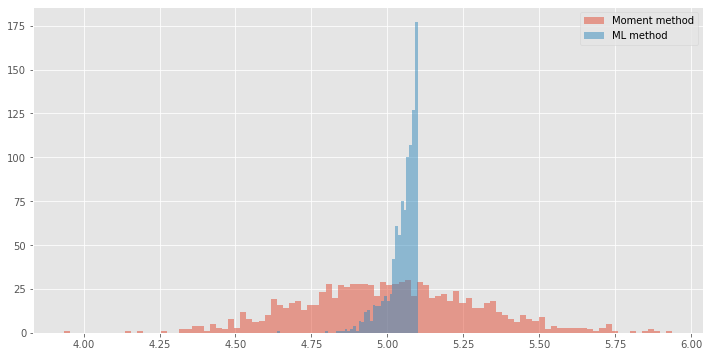

In [5]:
plt.figure(figsize=(12,6))
plt.hist(theta_1, bins=100, alpha=0.5, label='Moment method')
plt.hist(theta_2, bins=50, alpha=0.5, label='ML method')
plt.legend();

Видим, что у оценки максимального правдоподобия разброс оказался меньше.  

In [6]:
np.var(theta_1)

0.08440618422171434

In [7]:
np.var(theta_2)

0.0025514076294512905

На практике следовало бы выбрать её. Когда у оценки самый маленький разброс в каком-то классе (например, в классе несмещённых оценок), её называют __эффективной__ в этом классе. 

Кстати говоря, для оценок из этого упражнения, можно руками выяснить, что: 

$$ E(\hat \theta_{MM} - \theta)^2 = \frac{\theta^2}{3n} \qquad \qquad E(\hat \theta_{ML} - \theta)^2 = \frac{2 \theta^2}{n(n+1)}.$$

Получится, что при $n = 1,2$ дисперсии совпадут. При $n >2$ оценка максимального правдоподобия будет обладать меньшей дисперсией. Вывод этих формул руками можно посмотреть в [книге Черновой](https://nsu.ru/mmf/tvims/chernova/ms/ms_nsu07.pdf) на странице 33 (Пример 13).